# The Sparks Foundation

### Data Science and Business Analytics
### Task 1: Prediction Using Supervised ML
#### Created by\ Ahmed DARWISH


### Define the problem
+ Predict the student percentage based on the number of hours of study.
+ The feature is the number of hours studied and the target value is the percentage.
+ Task can be solved using simple linear regression (we only have two variables).

### Solution steps
+ Importing all libraries required
+ Reading data 
+ Plotting the distribution
+ Preparing the data
+ Training the Algorithm
+ Making Predictions
+ Evaluating the model

### Importing all libraries required

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading data from file

In [16]:
data_path = "student_scores.csv"
df = pd.read_csv(data_path)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [17]:
# Shape of data
df.shape

(25, 2)

In [18]:
# Check that the data set does not contain null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Plotting the distribution

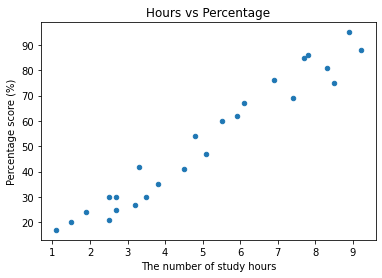

In [19]:
df.plot(kind='scatter', x='Hours', y='Scores')  
plt.title('Hours vs Percentage')  
plt.xlabel('The number of study hours')  
plt.ylabel('Percentage score (%)')  
plt.show()

#### From the above graph, we can clearly see that there is a positive direct relationship between the number of hours studied and the Percentage score.

## Preparing the data

In [20]:
# divide the data into "attributes" (inputs) and "labels" (outputs).

X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

The next step is to divide this data into training and test sets once we have our attributes and labels. Scikit-built-in Learn's train test split() method will be used to accomplish this:

In [21]:
# Spliting the data to train & test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Training the Algorithm

In [22]:
# Create a model and fit it

from sklearn.linear_model import LinearRegression
model_Regression = LinearRegression()
model_Regression.fit(X_train,y_train)

LinearRegression()

In [23]:
# intercept_ represents the coefficient 𝑏₀
b0 = model_Regression.intercept_ 
# coef_ represents 𝑏₁
b1 = model_Regression.coef_
print('slope:', b1)

slope: [9.68207815]


#### If a student studies one hour more than he studied on the test previously, he can expect to achieve a 9.68% increase in the grade previously achieved by the student.

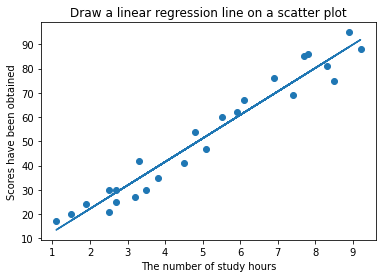

In [24]:
# Plotting the regression line
regression_line = b0 + b1*X

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, regression_line);
plt.title('Draw a linear regression line on a scatter plot')
plt.xlabel("The number of study hours")
plt.ylabel("Scores have been obtained")
plt.show()

## Making Predictions

In [25]:
# Testing data - In Hours
print(X_test)

# Predicting the scores
y_pred = model_Regression.predict(X_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [26]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred}) 
df 

,Actual_value,Predicted_value
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [27]:
# est with your own data
hours = [[9.25]]
own_pred = model_Regression.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.38611528261494


## Evaluating the model

#### Evaluation of the algorithm's performance is the final phase. This stage is crucial for evaluating how well various algorithms perform on a certain collection of data. Here, we picked the mean squared error for simplicity. Such measures are numerous.

In [28]:
from sklearn import metrics

# The mean of the absolute value of the errors.
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))


Mean Absolute Error: 3.9207511902099244
